# Caelan Osman
# Feb. 1 2022
# Homework 12.1

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.special import expit
from IPython.display import Latex, display

## Exercise 12.1

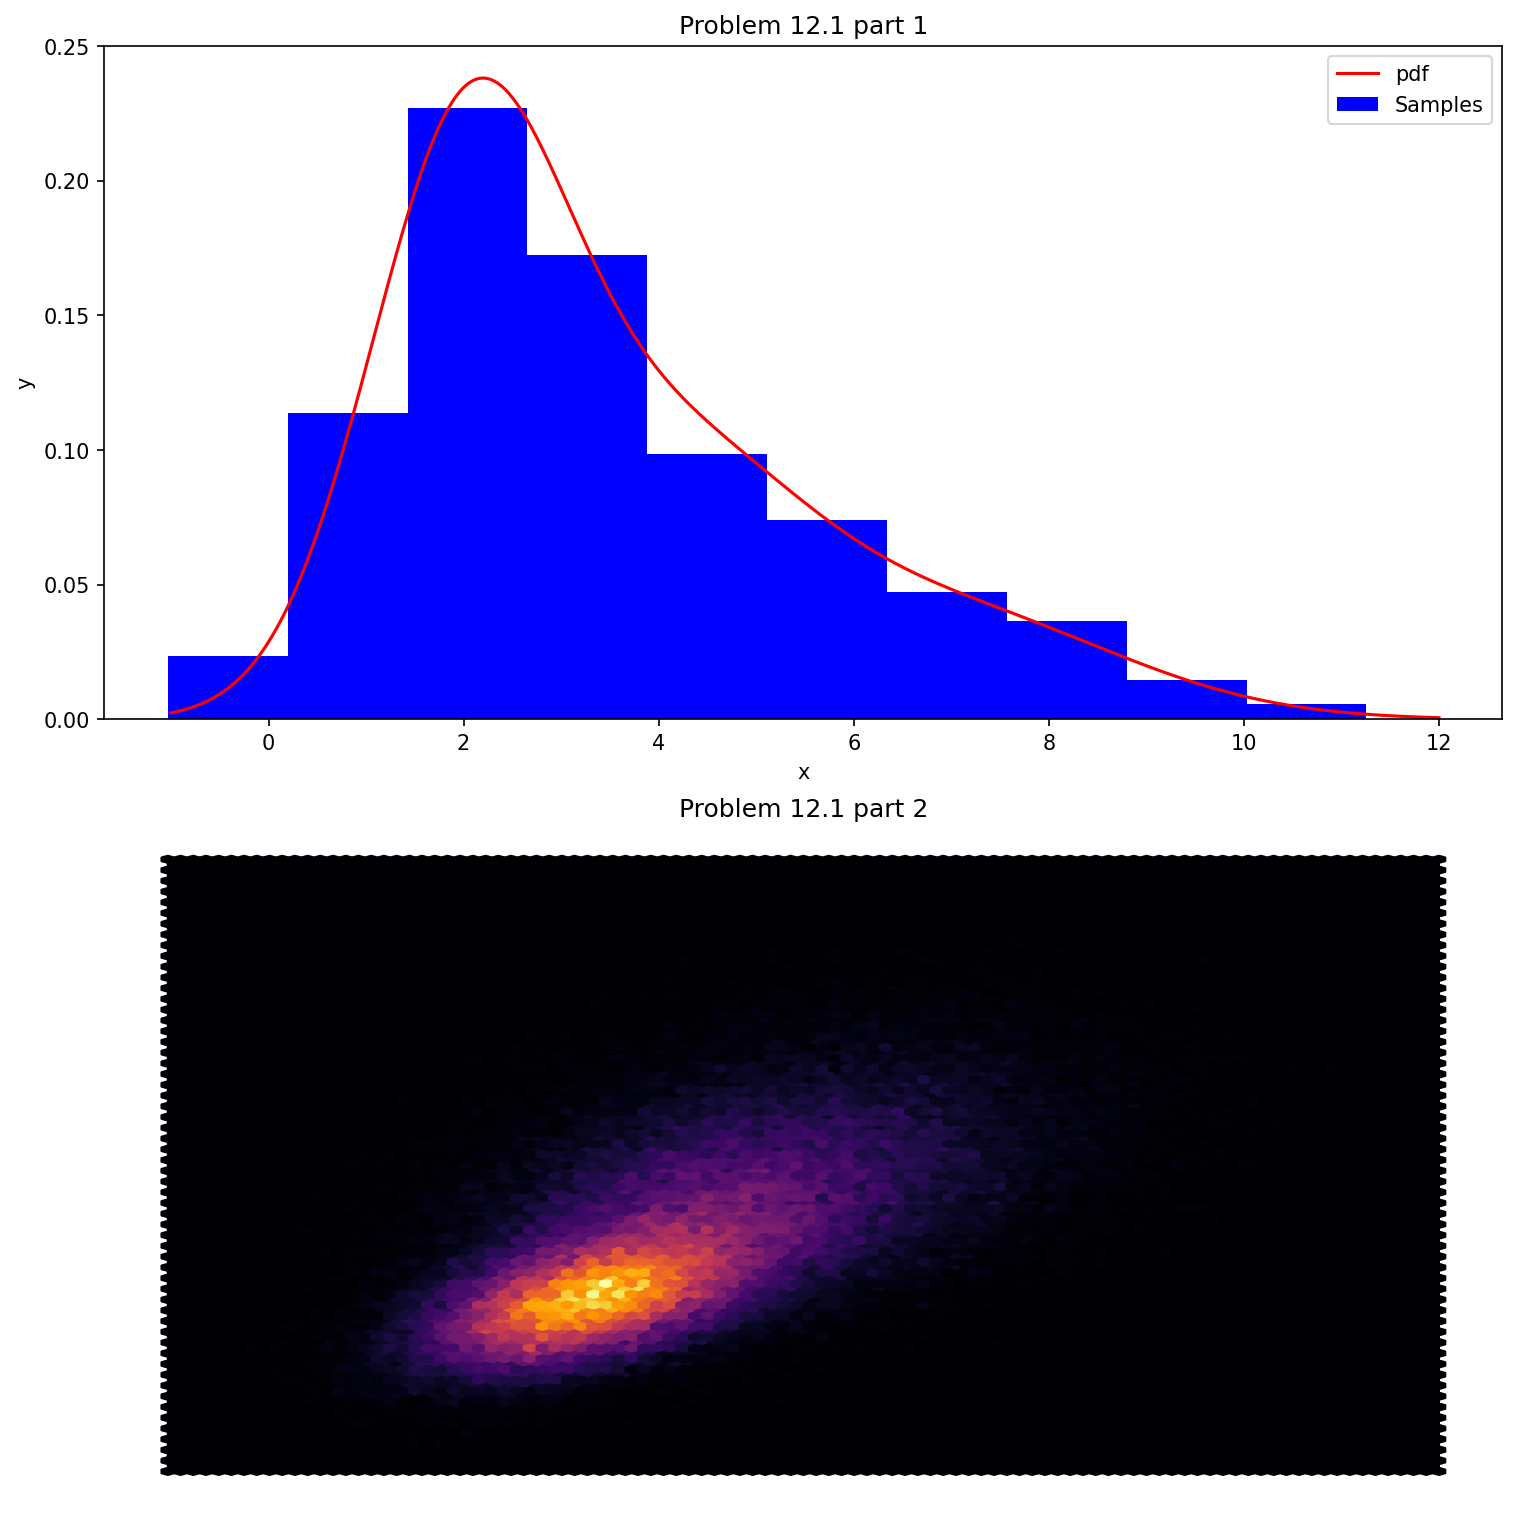

In [64]:
def GMM_sampler(d, K, weights, μ_vecs, Σ_mats, n_samples=int(1e3)):
        
    #check for vectorization
    if d == 1:
        #initalize samples array
        samples = np.empty(n_samples)
        #populate samples array
        for i in range(n_samples):
            #get random choice of k
            k = np.random.choice(np.arange(0, K), p=weights)
            #now sample from appropriate distribution
            samples[i] = np.random.normal(loc=μ_vecs[k], scale=np.sqrt(Σ_mats[k, 0]), size=1)
        return samples
    if d == 2:
        samples = np.empty((n_samples, d))
        for i in range(n_samples):
            #get random choice of k
            k = np.random.choice(np.arange(0, K), p=weights)
            samples[i] = np.random.multivariate_normal(μ_vecs[k], Σ_mats[k])
                                 
        return samples

def problem12_1():
    
    ########################
    #### Part 1:
    ########################
    weights1 = np.array([1/2., 1/3., 1/6.])
    μ_vecs1 = np.array([2, 4, 7])
    Σ_mats1 = np.array([[1], [2], [3] ])
    #create pdf
    pdf1 = lambda z: np.sum([weights1[i]*
                            norm.pdf(z, loc=μ_vecs1[i], scale=np.sqrt(Σ_mats1[i, 0])) 
                            for i in range(3)], axis=0)
    #get samples
    samples1 = GMM_sampler(1, 3, weights1, μ_vecs1, Σ_mats1)

    ########################
    #### part 2
    ########################
    weights2 = weights1.copy()
    μ_vecs2 = np.array([[2, 3], [4, 6], [6, 9]])
    Σ_mats2 = np.array([ 
        [[2, 1],
         [1, 2]], 
        [[4, 1], 
         [1, 4]], 
        [[6, 1], 
         [1, 6]]])
    samples2 = GMM_sampler(2, 3, weights2, μ_vecs2, Σ_mats2, n_samples=int(1e5))
    
    # create figure
    fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 10))
    fig.set_dpi(150)
    ax = axs[0]
    # plot
    x1 = np.linspace(-1, 12, 1000)
    ax.plot(x1, pdf1(x1), 'r-', label='pdf')
    ax.hist(samples1,bins=10, label='Samples', color='blue', density=True)
    ax.set_title('Problem 12.1 part 1')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    ax = axs[1]
    ax.hexbin(samples2[:, 0], samples2[:, 1], cmap='inferno')
    ax.set_title('Problem 12.1 part 2')
    ax.axis('off')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
                                 
    plt.show()
    
    return

problem12_1()

## Exercise 12.2

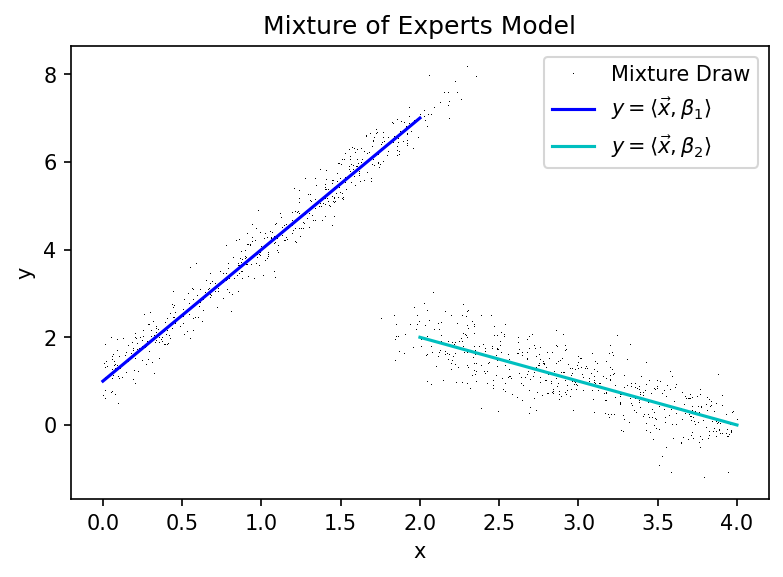

In [77]:
def mixture_of_experts(X, V, β1, β2, σ1, σ2):
    
    y = np.empty_like(X)
    
    for i, x in enumerate(X):
        #create x vector
        x_vec = np.array([1, x])
        #get categorical draw
        z = np.random.binomial(1, expit(np.inner(V, x_vec)))
        #draw from correct corresponding normal distribution
        if z == 0:
            y[i] = np.random.normal(loc=np.inner(x_vec, β1), scale=np.sqrt(σ1))
        else:
            y[i] = np.random.normal(loc=np.inner(x_vec, β2), scale=np.sqrt(σ2))
    
    #return draws
    return y

def problem12_2():
    
    #intialize varaibles
    V = np.array([-20, 10])
    β1 = np.array([1, 3])
    β2 = np.array([4, -1])
    σ1 = 1/10.
    σ2 = 1/5.
    #get samples from univorm distribution
    X = np.random.uniform(low=0, high=4, size=int(1e3))
    #get mixture of experts sample
    y = mixture_of_experts(X, V, β1, β2, σ1, σ2)
    
    #define different regression fucntions
    f1 = lambda x: np.inner(x, β1)
    f2 = lambda x: np.inner(x, β2)
    x1 = np.ones((1000, 2))
    x2 = x1.copy()
    x1[:, 1] = np.linspace(0, 2, 1000)
    x2[:, 1] = np.linspace(2, 4, 1000)
    y1 = np.array([f1(x) for x in x1])
    y2 = np.array([f2(x) for x in x2])

    #plot everything
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(X, y, 'k,', label = 'Mixture Draw')
    ax.plot(x1[:, 1], y1, 'b-', label=r'$y=\langle\vec{x}, \beta_1\rangle$')
    ax.plot(x2[:, 1], y2, 'c-', label=r'$y=\langle\vec{x}, \beta_2\rangle$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Mixture of Experts Model')
    ax.legend(loc='best')
    plt.show()
    return

problem12_2()

## Exercise 12.3

We want to compute the probability $P(Z_0 = M, Z_1 = S, Z_2 = L |\lambda, X_0 = X_1 = X_2 = W)$. 
Notice that $Z_0, Z_1, Z_2 \perp X_1, X_2, X_3$ as $Z_0, Z_1, Z_2$ are d-separated by $X_1, X_2, X_3$. 
Therefore we have that 
\begin{align}
P(Z_0 = M, Z_1 = S, X_2 = L |\lambda, X_0= X_1 = X_2 = W)&= P(Z_0 = M | X_0 = W) P(Z_1 = S | X_1 = W) P(Z_2 = L| X_2 = W)\\
&= 0.4 \cdot 0.1 \cdot 0.5 = 0.02
\end{align}
#### Code for part 2 and part 3:

In [29]:
def problem12_3():
    #state map conditional probabibilites
    state_map_z = {'S|W':0.1, 'S|D':0.7, 'M|W' : 0.4, 'M|D':0.2, 'L|W':0.5, 'L|D':0.1}
    #all combinations
    combinations = [['S|W', 'M|W', 'L|W'],
                    ['S|D', 'M|W', 'L|W'], 
                    ['S|W', 'M|D', 'L|W'], 
                    ['S|W', 'M|W', 'L|D'], 
                    ['S|D', 'M|D', 'L|W'], 
                    ['S|W', 'M|D', 'L|D'], 
                    ['S|D', 'M|W', 'L|D'],
                    ['S|D', 'M|D', 'L|D']]
    
    all_variations = []
    for comb in combinations:
        num = np.prod([state_map_z[z] for z in comb])
        all_variations.append(num)
        
        
    ZRVs = ['Z_0 = ', 'Z_1 = ', 'Z_2 = ']
    XRVs = ['X_0 = ', 'X_1 = ', 'X_2 = ']
    print('PART2:')
    for comb, compute in zip(combinations, all_variations):
        str1 = ', '.join([ z + c[0] for z, c in zip(ZRVs,comb)])
        str2 = ', '.join([x + c[-1] for x, c in zip(XRVs, comb)])
        
        display(Latex('$P(' + str1 + '|' + str2 + ')$ = ' + str(round(compute, 4))))
        
    print('Part 3:')
    display(Latex('$P(Z_0 = M, Z_1 =S, Z_2 = L|\lambda) = $' + str(np.sum(all_variations))))        
    
    
    return
problem12_3()

PART2:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Part 3:


<IPython.core.display.Latex object>

### part 4

We have to consider all the possible combinations of $(X_0, \ldots, X_{n-1})$ if each $X_i$ is a binary random varaiable then there are $2^n$ possible combinations to calculate. 